# Introduction to Embeddings with the OpenAI API


In [44]:
pip install python-dotenv openai


Note: you may need to restart the kernel to use updated packages.


In [45]:
# added/edited
from dotenv import load_dotenv
from openai import OpenAI
import os
import openai

load_dotenv()
openai.api_key = os.environ["OPENAI_API_KEY"]

## What are Embeddings?

### Creating embeddings

In this exercise, you'll create your very first embeddings using the
OpenAI API. To interact with the API, you'll need your OpenAI API key.
If you haven't created one of these before, first, visit their [signup
page](https://platform.openai.com/signup). Next, navigate to the [API
keys page](https://platform.openai.com/account/api-keys) to create your
secret key. If you've lost your key, you can create a new one here, too.

<img
src="https://assets.datacamp.com/production/repositories/6309/datasets/842da12a5b68c9f3240978dcfb08726b57ee2a18/api-key-page.png"
style="width:100.0%" alt="The button to create a new secret key." />

OpenAI sometimes provides free credits to new users of the API, but this
can differ depending on geography. You may also need to add debit/credit
card details depending on geography and available credit. **You'll need
less than \$1 credit to complete this course.**

The `OpenAI` class from the `openai` library will be imported for you
throughout the course. **API keys used in this course's exercises will
not be stored in any way.**

**Instructions**

- Create an OpenAI client and set your API key.
- Create a request to the Embeddings endpoint, passing the
  `text-embedding-ada-002` model any text you wish.

**Answer**


In [46]:
# Create an OpenAI client and set your API key
client = OpenAI()

# Create a request to obtain embeddings
response = client.embeddings.create(
  model="text-embedding-ada-002",
  input="This can contain any text."
)

# Convert the response into a dictionary
response_dict = response.model_dump()

print(response_dict)


{'data': [{'embedding': [-0.021539565175771713, 0.015780678018927574, 0.0063082994893193245, -0.015502662397921085, -0.02341947890818119, 0.012444494292140007, -0.02298259735107422, -0.022466283291578293, -0.017342858016490936, -0.009551811031997204, -0.00038351217517629266, 0.03291171416640282, -0.005173070356249809, 0.006361254490911961, -0.00814849603921175, 0.006132884882390499, 0.013205726630985737, 0.00454753590747714, 0.014827482402324677, -0.020321594551205635, 0.004842099733650684, 0.0047957636415958405, -0.0064572361297905445, -0.006096478085964918, -0.024160852655768394, 0.0006222247029654682, 0.012384919449687004, -0.01991119049489498, -0.0064936429262161255, -0.017435530200600624, 0.03627437725663185, -0.014933392405509949, -0.006122955586761236, -0.02851642481982708, -0.006708773784339428, 0.0040808673948049545, 0.011583969928324223, -0.018719695508480072, 0.016786828637123108, -0.0011550873750820756, 0.018799129873514175, 0.010240229777991772, 0.0001714841346256435, -0.0

### Digging into the embeddings response

You've been able to successfully use the OpenAI Embeddings endpoint to
embed text data, and in this exercise, you'll finish this off by
extracting information from the API's response.

You've been provided with a response from the Embeddings API, which has
already been converted into a dictionary and stored as `response_dict`.
You'll need to extract the desired information from this dictionary.
This `response_dict` has been printed for you, so you can view its
contents and structure.

Recall that the response is structured like a nested Python dictionary,
and it can be accessed in much the same way.

**Instructions**

- Extract and print the `'total_tokens'` used from `response_dict`.

<!-- -->

- Extract the embeddings from `response_dict`.

**Answer**


In [47]:
# Extract the total_tokens from response_dict
print(response_dict['usage']['total_tokens'])

# Extract the embeddings from response_dict
print(response_dict['data'][0]['embedding'])


6
[-0.021539565175771713, 0.015780678018927574, 0.0063082994893193245, -0.015502662397921085, -0.02341947890818119, 0.012444494292140007, -0.02298259735107422, -0.022466283291578293, -0.017342858016490936, -0.009551811031997204, -0.00038351217517629266, 0.03291171416640282, -0.005173070356249809, 0.006361254490911961, -0.00814849603921175, 0.006132884882390499, 0.013205726630985737, 0.00454753590747714, 0.014827482402324677, -0.020321594551205635, 0.004842099733650684, 0.0047957636415958405, -0.0064572361297905445, -0.006096478085964918, -0.024160852655768394, 0.0006222247029654682, 0.012384919449687004, -0.01991119049489498, -0.0064936429262161255, -0.017435530200600624, 0.03627437725663185, -0.014933392405509949, -0.006122955586761236, -0.02851642481982708, -0.006708773784339428, 0.0040808673948049545, 0.011583969928324223, -0.018719695508480072, 0.016786828637123108, -0.0011550873750820756, 0.018799129873514175, 0.010240229777991772, 0.0001714841346256435, -0.00794991385191679, -0.0

### Embedding product descriptions

You've been provided with a list of dictionaries called `products`,
which contains product information for different products sold by an
online retailer. It's your job to embed the `'short_description'` for
each product to enable semantic search for the retailer's website.

Here's a preview of the `products` list of dictionaries:

``` python
products = [
    {
        "title": "Smartphone X1",
        "short_description": "The latest flagship smartphone with AI-powered features and 5G connectivity.",
        "price": 799.99,
        "category": "Electronics",
        "features": [
            "6.5-inch AMOLED display",
            "Quad-camera system with 48MP main sensor",
            "Face recognition and fingerprint sensor",
            "Fast wireless charging"
        ]
    },
    ...
]
```

**Instructions**

- Copy your API key and provide it to the `OpenAI` client.
- Create a list called `product_descriptions` containing the
  `'short_description'` for each product in `products` using a list
  comprehension.
- Create embeddings for each product `'short_description'` using
  **batching**, passing the input to the `text-embedding-ada-002` model.
- Extract the embeddings for each product from `response_dict` and store
  them in `products` under a new key called `'embedding'`.

**Answer**


In [48]:
# added/edited
products = [
    { "title": "Smartphone X1", "short_description": "The latest flagship smartphone with AI-powered features and 5G connectivity.", "price": 799.99, "category": "Electronics", "features": [ "6.5-inch AMOLED display", "Quad-camera system with 48MP main sensor", "Face recognition and fingerprint sensor", "Fast wireless charging", ], },
    { "title": "Luxury Diamond Necklace", "short_description": "Elegant necklace featuring genuine diamonds, perfect for special occasions.", "price": 1499.99, "category": "Beauty", "features": [ "18k white gold chain", "0.5 carat diamond pendant", "Adjustable chain length", "Gift box included", ], },
    { "title": "RC Racing Car", "short_description": "High-speed remote-controlled racing car for adrenaline-packed fun.", "price": 89.99, "category": "Toys", "features": [ "Top speed of 30 mph", "Responsive remote control", "Rechargeable battery", "Durable construction", ], },
    { "title": "Ultra HD 4K TV", "short_description": "Immerse yourself in stunning visuals with this 65-inch 4K TV.", "price": 1299.99, "category": "Electronics", "features": [ "65-inch 4K UHD display", "Dolby Vision and HDR10+ support", "Smart TV with streaming apps", "Voice remote included", ], },
    { "title": "Glowing Skin Serum", "short_description": "Revitalize your skin with this nourishing serum for a radiant glow.", "price": 39.99, "category": "Beauty", "features": [ "Hyaluronic acid and vitamin C", "Hydrates and reduces fine lines", "Suitable for all skin types", "Cruelty-free", ], },
    { "title": "LEGO Space Shuttle", "short_description": "Build your own space adventure with this LEGO space shuttle set.", "price": 49.99, "category": "Toys", "features": [ "359 pieces for creative building", "Astronaut minifigure included", "Compatible with other LEGO sets", "For ages 7+", ], },
    { "title": "Wireless Noise-Canceling Headphones", "short_description": "Enjoy immersive audio and block out distractions with these headphones.", "price": 199.99, "category": "Electronics", "features": [ "Active noise cancellation", "Bluetooth 5.0 connectivity", "Long-lasting battery life", "Foldable design for portability", ], },
    { "title": "Luxury Perfume Gift Set", "short_description": "Indulge in a collection of premium fragrances with this gift set.", "price": 129.99, "category": "Beauty", "features": [ "Five unique scents", "Elegant packaging", "Perfect gift for fragrance enthusiasts", "Variety of fragrance notes", ], },
    { "title": "Remote-Controlled Drone", "short_description": "Take to the skies and capture stunning aerial footage with this drone.", "price": 299.99, "category": "Electronics", "features": [ "4K camera with gimbal stabilization", "GPS-assisted flight", "Remote control with smartphone app", "Return-to-home function", ], },
    { "title": "Luxurious Spa Gift Basket", "short_description": "Pamper yourself or a loved one with this spa gift basket full of relaxation goodies.", "price": 79.99, "category": "Beauty", "features": [ "Bath bombs, body lotion, and more", "Aromatherapy candles", "Reusable wicker basket", "Great for self-care", ], },
    { "title": "Robot Building Kit", "short_description": "Learn robotics and coding with this educational robot building kit.", "price": 59.99, "category": "Toys", "features": [ "Build and program your own robot", "STEM learning tool", "Compatible with Scratch and Python", "Ideal for young inventors", ], },
    { "title": "High-Performance Gaming Laptop", "short_description": "Dominate the gaming world with this powerful gaming laptop.", "price": 1499.99, "category": "Electronics", "features": [ "Intel Core i7 processor", "NVIDIA RTX graphics", "144Hz refresh rate display", "RGB backlit keyboard", ], },
    { "title": "Natural Mineral Makeup Set", "short_description": "Enhance your beauty with this mineral makeup set for a flawless look.", "price": 34.99, "category": "Beauty", "features": [ "Mineral foundation and eyeshadows", "Non-comedogenic and paraben-free", "Cruelty-free and vegan", "Includes makeup brushes", ], },
    { "title": "Interactive Robot Pet", "short_description": "Adopt your own robot pet that responds to your voice and touch.", "price": 79.99, "category": "Toys", "features": [ "Realistic pet behaviors", "Voice recognition and touch sensors", "Teaches responsibility and empathy", "Rechargeable battery", ], },
    { "title": "Smart Thermostat", "short_description": "Control your home's temperature and save energy with this smart thermostat.", "price": 129.99, "category": "Electronics", "features": [ "Wi-Fi connectivity", "Energy-saving features", "Compatible with voice assistants", "Easy installation", ], },
    { "title": "Designer Makeup Brush Set", "short_description": "Upgrade your makeup routine with this premium designer brush set.", "price": 59.99, "category": "Beauty", "features": [ "High-quality synthetic bristles", "Chic designer brush handles", "Complete set for all makeup needs", "Includes stylish carrying case", ], },
    { "title": "Remote-Controlled Dinosaur Toy", "short_description": "Roar into action with this remote-controlled dinosaur toy with lifelike movements.", "price": 49.99, "category": "Toys", "features": [ "Realistic dinosaur sound effects", "Walks and roars like a real dinosaur", "Remote control included", "Educational and entertaining", ], },
    { "title": "Wireless Charging Dock", "short_description": "Charge your devices conveniently with this sleek wireless charging dock.", "price": 39.99, "category": "Electronics", "features": [ "Qi wireless charging technology", "Supports multiple devices", "LED charging indicators", "Compact and stylish design", ], },
    { "title": "Luxury Skincare Set", "short_description": "Elevate your skincare routine with this luxurious skincare set.", "price": 179.99, "category": "Beauty", "features": [ "Premium anti-aging ingredients", "Hydrating and rejuvenating formulas", "Complete skincare regimen", "Elegant packaging", ], },
]

In [49]:
# Set your API key
client = OpenAI()

# Extract a list of product short descriptions from products
product_descriptions = [product['short_description'] for product in products]

# Create embeddings for each product description
response = client.embeddings.create(
  model="text-embedding-ada-002",
  input=product_descriptions
)
response_dict = response.model_dump()

# Extract the embeddings from response_dict and store in products
for i, product in enumerate(products):
    product['embedding'] = response_dict['data'][i]['embedding']
    
print(products[0].items())


dict_items([('title', 'Smartphone X1'), ('short_description', 'The latest flagship smartphone with AI-powered features and 5G connectivity.'), ('price', 799.99), ('category', 'Electronics'), ('features', ['6.5-inch AMOLED display', 'Quad-camera system with 48MP main sensor', 'Face recognition and fingerprint sensor', 'Fast wireless charging']), ('embedding', [-0.014559355564415455, 0.003652815008535981, 0.004321092274039984, -0.01720651052892208, -0.0038409708067774773, 0.015078405849635601, -0.021709270775318146, 0.00028912711422890425, -0.016376031562685966, -0.014689117670059204, 0.028833232820034027, 0.010951956734061241, -0.009329925291240215, -0.021501651033759117, -0.01838734932243824, -0.010608086362481117, 0.011977081187069416, -0.012275534681975842, 0.02156653255224228, -0.020204024389386177, -0.016142457723617554, 0.0064621735364198685, 0.008175038732588291, 0.006066398229449987, 0.005745235830545425, -0.010854635387659073, 0.005956099834293127, -0.0006293482729233801, 0.007

### Visualizing the embedded descriptions

Now that you've created embeddings from the product descriptions, it's
time to explore them! You'll use
[t-SNE](https://www.datacamp.com/tutorial/introduction-t-sne) to reduce
the number of dimensions in the embeddings data from 1,536 to two, which
will make the data much easier to visualize.

You'll start with the `products` list of dictionaries you worked with in
the last exercise, containing product information and the embeddings you
created from the `'short_description'`. As a reminder, here's a preview
of `products`:

``` python
products = [
    {
        "title": "Smartphone X1",
        "short_description": "The latest flagship smartphone with AI-powered features and 5G connectivity.",
        "price": 799.99,
        "category": "Electronics",
        "features": [
            "6.5-inch AMOLED display",
            "Quad-camera system with 48MP main sensor",
            "Face recognition and fingerprint sensor",
            "Fast wireless charging"
        ],
        "embedding": [-0.014650369994342327, ..., 0.008677126839756966]
    },
    ...
]
```

`matplotlib.pyplot` and `numpy` have been imported as `plt` and `np`,
respectively.

**Instructions**

- Create two lists by extracting information from `products` using list
  comprehensions: `categories`, containing the `'category'` of each
  product, and `embeddings`, containing the embedded short description.
- Reduce the number of embeddings dimensions from 1,536 to two using the `tsne` model provided.
- Create a scatter plot of the 2D embeddings, plotting the first column from `embeddings_2d` on the x-axis and the second column on the y-axis.

**Answer**


In [50]:
pip install scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [51]:
# added/edited
import numpy as np
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE


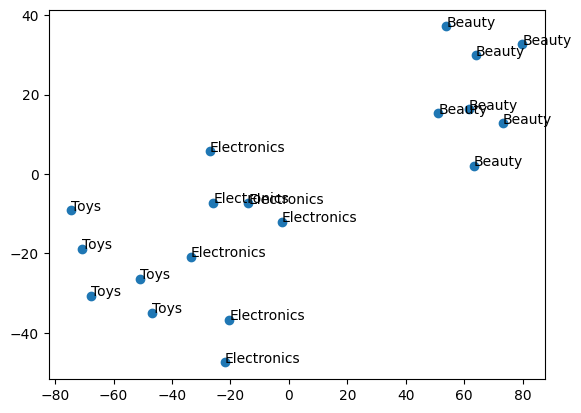

In [52]:
# Create categories and embeddings lists using list comprehensions
categories = [product['category'] for product in products]
embeddings = [product['embedding'] for product in products]

# Create reviews and embeddings lists using list comprehensions
categories = [product['category'] for product in products]
embeddings = [product['embedding'] for product in products]

# Reduce the number of embeddings dimensions to two using t-SNE
tsne = TSNE(n_components=2, perplexity=5)
embeddings_2d = tsne.fit_transform(np.array(embeddings))

# Create reviews and embeddings lists using list comprehensions
categories = [product['category'] for product in products]
embeddings = [product['embedding'] for product in products]

# Reduce the number of embeddings dimensions to two using t-SNE
tsne = TSNE(n_components=2, perplexity=5)
embeddings_2d = tsne.fit_transform(np.array(embeddings))

# Create a scatter plot from embeddings_2d
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

for i, category in enumerate(categories):
    plt.annotate(category, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.show()


### More repeatable embeddings

As you continue to work with embeddings, you'll find yourself making
repeated calls to OpenAI's embedding model. To make these calls in a
more repeatable and modular way, it would be better to define a custom
function called `create_embeddings()` that would output embeddings for
any number of text inputs. In this exercise, you'll do just that!

**Instructions**

- Copy your API key and provide it to the `OpenAI` client.
- Define a `create_embeddings()` function that sends an input, `texts`,
  to the embedding model, and returns a list containing the embeddings
  for each input text.
- Embed `short_description` using `create_embeddings()`, and extract and
  print the embeddings in a single list.
- Embed `list_of_descriptions` using `create_embeddings()` and print.

**Answer**


In [53]:
# added/edited
short_description = 'The latest flagship smartphone with AI-powered features and 5G connectivity.'
list_of_descriptions = ['Charge your devices conveniently with this sleek wireless charging dock.', 'Elevate your skincare routine with this luxurious skincare set.']


In [54]:
# Set your API key
client = OpenAI()

# Define a create_embeddings function
def create_embeddings(texts):
  response = client.embeddings.create(
    model="text-embedding-ada-002",
    input=texts
  )
  response_dict = response.model_dump()

  return [data['embedding'] for data in response_dict['data']]

# Embed short_description and print
print(create_embeddings(short_description)[0])

# Embed list_of_descriptions and print
print(create_embeddings(list_of_descriptions))


[-0.014584976248443127, 0.003610560204833746, 0.0043242378160357475, -0.017258023843169212, -0.0038733233232051134, 0.01501318346709013, -0.0217087771743536, 0.00027087313355877995, -0.016336731612682343, -0.014662832021713257, 0.028780674561858177, 0.01101010013371706, -0.009336201474070549, -0.021475210785865784, -0.018386932089924812, -0.010633797384798527, 0.011950857006013393, -0.012379064224660397, 0.021540090441703796, -0.020190590992569923, -0.016090188175439835, 0.006491222884505987, 0.008174853399395943, 0.006050040479749441, 0.005758081097155809, -0.010821948759257793, 0.005930012557655573, -0.0006110864924266934, 0.007097849156707525, -0.0026081674732267857, 0.02134545147418976, -0.001849074033088982, -0.023265892639756203, 0.004071206785738468, -0.018918946385383606, 0.025653468444943428, 0.011120395734906197, -0.012145496904850006, 0.021981272846460342, -0.015947451815009117, 0.021617945283651352, 0.003801955608651042, 0.0018863799050450325, 0.016803866252303123, -0.03116

### Finding the most similar product

Being able to compute similarity between embeddings is a key step within
embeddings applications. In this exercise, you'll return to the
`products` list of dictionaries that you worked with previously, which
contains the embedded short descriptions you also created earlier.

You'll compare a piece of text to these embedded descriptions to
identify the most similar description.

`numpy` has been imported as `np`, and `distance` is available from
`scipy.spatial`. A `create_embeddings()` function has already been
defined for you and is available to use for creating embeddings from a
single input.

**Instructions**

- Copy your API key and provide it to the `OpenAI` client.
- Embed the text, `"soap"`, using your `create_embeddings()` custom
  function and extract a single list of embeddings.
- Compute the cosine distance between the `query_embedding` and the
  embeddings in `product`.
- Find and print the `'short_description'` of the most similar product
  to the search text using the cosine distances in `distances`.

**Answer**


In [55]:
# added/edited
from scipy.spatial import distance


In [56]:
# Set your API key
client = OpenAI()

# Embed the search text
search_text = "soap"
search_embedding = create_embeddings(search_text)[0]

distances = []
for product in products:
  # Compute the cosine distance for each product description
  dist = distance.cosine(search_embedding, product["embedding"])
  distances.append(dist)

# Find and print the most similar product short_description    
min_dist_ind = np.argmin(distances)
print(products[min_dist_ind]['short_description'])


Elevate your skincare routine with this luxurious skincare set.


## Embeddings for AI Applications

### Enriching embeddings

Previously, when you embedded product information, you were limited to
only embedding the product `'short_description'`, which captured some,
but not all of the relevant product information available. In this
exercise, you'll embed `'title'`, `'short_description'`, `'category'`,
and `'features'` to capture much more information.

Here's a reminder of the `products` list of dictionaries:

``` python
products = [
    {
        "title": "Smartphone X1",
        "short_description": "The latest flagship smartphone with AI-powered features and 5G connectivity.",
        "price": 799.99,
        "category": "Electronics",
        "features": [
            "6.5-inch AMOLED display",
            "Quad-camera system with 48MP main sensor",
            "Face recognition and fingerprint sensor",
            "Fast wireless charging"
        ]
    },
    ...
]
```

When combining the features into a single string, it should have the
following structure:

```
Title: <product title>
Description: <product description>
Category: <product category>
Features: <feature 1>; <feature 2>; <feature 3>; ...
```


**Instructions**

- Copy your API key and provide it to the `OpenAI` client.
- Define a function called `create_product_text()` to combine the
  `title`, `short_description`, `category`, and `features` data into a
  single string with the desired structure.
- Use `create_product_text()` to combine the features for each product
  in `products`, storing the results in a list.
- Embed the text in `product_texts`.

**Answer**


In [57]:
# Set your API key
client = OpenAI()

# Define a function to combine the relevant features into a single string
def create_product_text(product):
  return f"""Title: {product['title']}
Description: {product['short_description']}
Category: {product['category']}
Features: {'; '.join(product['features'])}"""

# Combine the features for each product
product_texts = [create_product_text(product) for product in products]

# Create the embeddings from product_texts
product_embeddings = create_embeddings(product_texts)


### Sorting by similarity

Now that you've embedded all of your features, the next step is to
compute the similarities. In this exercise, you'll define a function
called `find_n_closest()`, which computes the cosine distances between a
query vector and a list of embeddings and returns the `n` smallest
distances and their indexes.

In the next exercise, you'll use this function to enable your semantic
product search application.

`distance` has been imported from `scipy.spatial`.

**Instructions**

- Calculate the cosine distance between the `query_vector` and
  `embedding`.
- Append a dictionary containing `dist` and its `index` to the
  `distances` list.
- Sort the `distances` list by the `'distance'` key of each dictionary.
- Return the first `n` elements in `distances_sorted`.

**Answer**


In [58]:
# added/edited
from scipy import spatial


In [59]:
def find_n_closest(query_vector, embeddings, n=3):
  distances = []
  for index, embedding in enumerate(embeddings):
    # Calculate the cosine distance between the query vector and embedding
    dist = distance.cosine(query_vector, embedding)
    # Append the distance and index to distances
    distances.append({"distance": dist, "index": index})
  # Sort distances by the distance key
  distances_sorted = sorted(distances, key=lambda x: x["distance"])
  # Return the first n elements in distances_sorted
  return distances_sorted[0:n]


### Semantic search for products

Time to put your `find_n_closest()` function to use! You'll test out
your semantic product search on a test query, computing a sorted list of
the five most semantically similar products, based on the enriched data
you gave the model.

Here's a reminder of the `find_n_closest()` function you created in the
previous exercise:

``` python
def find_n_closest(query_vector, embeddings, n=3):
    distances = []
    for index, embedding in enumerate(embeddings):
        distance = spatial.distance.cosine(query_vector, embedding)
        distances.append({"distance": distance, "index": index})
    distances_sorted = sorted(distances, key=lambda x: x["distance"])
    return distances_sorted[0:n]
```

The `create_embeddings()` function you created earlier is also
available. Recall that it takes some text, and returns a list of lists
containing the embeddings for each text. The `products` dictionary and
the `product_embeddings` you created previously have also been loaded.

**Instructions**

- Copy your API key and provide it to the `OpenAI` client.
- Create the query vector from `query_text`.
- Find the five closest distances and their corresponding indexes using
  the `find_n_closest()` function.
- Loop over `hits` and extract the product at each `'index'` in the
  `hits` list.

**Answer**


In [60]:
# Set your API key
client = OpenAI()

# Create the query vector from query_text
query_text = "computer"
query_vector = create_embeddings(query_text)[0]

# Find the five closest distances
hits = find_n_closest(query_vector, product_embeddings, n=5)

print(f'Search results for "{query_text}"')
for hit in hits:
  # Extract the product at each index in hits
  product = products[hit['index']]
  print(product["title"])


Search results for "computer"
High-Performance Gaming Laptop
Interactive Robot Pet
Remote-Controlled Drone
Wireless Charging Dock
Wireless Noise-Canceling Headphones


### Product recommendation system

In this exercise, you'll make a recommendation system for an online
retailer that sells a variety of products. This system recommends three
similar products to users who visit a product page but don't purchase,
based on the last product they visited.

You've been provided with a list of dictionaries of products available
on the site,

``` python
products = [
    {
        "title": "Smartphone X1",
        "short_description": "The latest flagship smartphone with AI-powered features and 5G connectivity.",
        "price": 799.99,
        "category": "Electronics",
        "features": [
            "6.5-inch AMOLED display",
            ...
            "Fast wireless charging"
        ]
    },
    ...
]

```

and a dictionary for the last product the user visited, stored in
`last_product`.

The following custom functions defined earlier in the course are also
available for you to use:

- `create_embeddings(texts)` → returns a list of embeddings for each
  text in `texts`.
- `create_product_text(product)` → combines the `product` features into
  a single string for embedding.
- `find_n_closest(query_vector, embeddings, n=3)` → returns the `n`
  closest distances and their indexes between the `query_vector` and
  `embeddings`, based on cosine distances.

**Instructions**

- Copy your API key and provide it to the `OpenAI` client.
- Combine the text features in `last_product`, and for each product in
  `products`, using `create_product_text()`.
- Embed the `last_product_text` and `product_texts` using
  `create_embeddings()`, ensuring that `last_product_embeddings` is a
  single list.
- Find the three smallest cosine distances and their indexes using
  `find_n_closest()`.

**Answer**


In [61]:
# added/edited
products = [
    {'title': 'Smartphone X1', 'short_description': 'The latest flagship smartphone with AI-powered features and 5G connectivity.', 'price': 799.99, 'category': 'Electronics', 'features': ['6.5-inch AMOLED display', 'Quad-camera system with 48MP main sensor', 'Face recognition and fingerprint sensor', 'Fast wireless charging']},
    {'title': 'Luxury Diamond Necklace', 'short_description': 'Elegant necklace featuring genuine diamonds, perfect for special occasions.', 'price': 1499.99, 'category': 'Beauty', 'features': ['18k white gold chain', '0.5 carat diamond pendant', 'Adjustable chain length', 'Gift box included']},
    {'title': 'RC Racing Car', 'short_description': 'High-speed remote-controlled racing car for adrenaline-packed fun.', 'price': 89.99, 'category': 'Toys', 'features': ['Top speed of 30 mph', 'Responsive remote control', 'Rechargeable battery', 'Durable construction']},
    {'title': 'Ultra HD 4K TV', 'short_description': 'Immerse yourself in stunning visuals with this 65-inch 4K TV.', 'price': 1299.99, 'category': 'Electronics', 'features': ['65-inch 4K UHD display', 'Dolby Vision and HDR10+ support', 'Smart TV with streaming apps', 'Voice remote included']},
    {'title': 'Glowing Skin Serum', 'short_description': 'Revitalize your skin with this nourishing serum for a radiant glow.', 'price': 39.99, 'category': 'Beauty', 'features': ['Hyaluronic acid and vitamin C', 'Hydrates and reduces fine lines', 'Suitable for all skin types', 'Cruelty-free']},
    {'title': 'LEGO Space Shuttle', 'short_description': 'Build your own space adventure with this LEGO space shuttle set.', 'price': 49.99, 'category': 'Toys', 'features': ['359 pieces for creative building', 'Astronaut minifigure included', 'Compatible with other LEGO sets', 'For ages 7+']},
    {'title': 'Wireless Noise-Canceling Headphones', 'short_description': 'Enjoy immersive audio and block out distractions with these headphones.', 'price': 199.99, 'category': 'Electronics', 'features': ['Active noise cancellation', 'Bluetooth 5.0 connectivity', 'Long-lasting battery life', 'Foldable design for portability']},
    {'title': 'Luxury Perfume Gift Set', 'short_description': 'Indulge in a collection of premium fragrances with this gift set.', 'price': 129.99, 'category': 'Beauty', 'features': ['Five unique scents', 'Elegant packaging', 'Perfect gift for fragrance enthusiasts', 'Variety of fragrance notes']},
    {'title': 'Remote-Controlled Drone', 'short_description': 'Take to the skies and capture stunning aerial footage with this drone.', 'price': 299.99, 'category': 'Electronics', 'features': ['4K camera with gimbal stabilization', 'GPS-assisted flight', 'Remote control with smartphone app', 'Return-to-home function']},
    {'title': 'Luxurious Spa Gift Basket', 'short_description': 'Pamper yourself or a loved one with this spa gift basket full of relaxation goodies.', 'price': 79.99, 'category': 'Beauty', 'features': ['Bath bombs, body lotion, and more', 'Aromatherapy candles', 'Reusable wicker basket', 'Great for self-care']},
    {'title': 'Robot Building Kit', 'short_description': 'Learn robotics and coding with this educational robot building kit.', 'price': 59.99, 'category': 'Toys', 'features': ['Build and program your own robot', 'STEM learning tool', 'Compatible with Scratch and Python', 'Ideal for young inventors']},
    {'title': 'High-Performance Gaming Laptop', 'short_description': 'Dominate the gaming world with this powerful gaming laptop.', 'price': 1499.99, 'category': 'Electronics', 'features': ['Intel Core i7 processor', 'NVIDIA RTX graphics', '144Hz refresh rate display', 'RGB backlit keyboard']},
    {'title': 'Natural Mineral Makeup Set', 'short_description': 'Enhance your beauty with this mineral makeup set for a flawless look.', 'price': 34.99, 'category': 'Beauty', 'features': ['Mineral foundation and eyeshadows', 'Non-comedogenic and paraben-free', 'Cruelty-free and vegan', 'Includes makeup brushes']},
    {'title': 'Interactive Robot Pet', 'short_description': 'Adopt your own robot pet that responds to your voice and touch.', 'price': 79.99, 'category': 'Toys', 'features': ['Realistic pet behaviors', 'Voice recognition and touch sensors', 'Teaches responsibility and empathy', 'Rechargeable battery']},
    {'title': 'Smart Thermostat', 'short_description': "Control your home's temperature and save energy with this smart thermostat.", 'price': 129.99, 'category': 'Electronics', 'features': ['Wi-Fi connectivity', 'Energy-saving features', 'Compatible with voice assistants', 'Easy installation']},
    {'title': 'Designer Makeup Brush Set', 'short_description': 'Upgrade your makeup routine with this premium designer brush set.', 'price': 59.99, 'category': 'Beauty', 'features': ['High-quality synthetic bristles', 'Chic designer brush handles', 'Complete set for all makeup needs', 'Includes stylish carrying case']},
    {'title': 'Remote-Controlled Dinosaur Toy', 'short_description': 'Roar into action with this remote-controlled dinosaur toy with lifelike movements.', 'price': 49.99, 'category': 'Toys', 'features': ['Realistic dinosaur sound effects', 'Walks and roars like a real dinosaur', 'Remote control included', 'Educational and entertaining']},
    {'title': 'Wireless Charging Dock', 'short_description': 'Charge your devices conveniently with this sleek wireless charging dock.', 'price': 39.99, 'category': 'Electronics', 'features': ['Qi wireless charging technology', 'Supports multiple devices', 'LED charging indicators', 'Compact and stylish design']},
    {'title': 'Luxury Skincare Set', 'short_description': 'Elevate your skincare routine with this luxurious skincare set.', 'price': 179.99, 'category': 'Beauty', 'features': ['Premium anti-aging ingredients', 'Hydrating and rejuvenating formulas', 'Complete skincare regimen', 'Elegant packaging']}
]
last_product = {'title': 'Building Blocks Deluxe Set', 'short_description': 'Unleash your creativity with this deluxe set of building blocks for endless fun.', 'price': 34.99, 'category': 'Toys', 'features': ['Includes 500+ colorful building blocks', 'Promotes STEM learning and creativity', 'Compatible with other major brick brands', 'Comes with a durable storage container', 'Ideal for children ages 3 and up']}

In [62]:
# Set your API key
client = OpenAI()

# Combine the features for last_product and each product in products
last_product_text = create_product_text(last_product)
product_texts = [create_product_text(product) for product in products]

# Embed last_product_text and product_texts
last_product_embeddings = create_embeddings(last_product_text)[0]
product_embeddings = create_embeddings(product_texts)

# Find the three smallest cosine distances and their indexes
hits = find_n_closest(last_product_embeddings, product_embeddings)

for hit in hits:
  product = products[hit['index']]
  print(product['title'])


LEGO Space Shuttle
Robot Building Kit
Luxury Skincare Set


### Adding user history to the recommendation engine

For many recommendation cases, such as film or purchase recommendation,
basing the next recommendation on one data point will be insufficient.
In these cases, you'll need to embed all or some of the user's history
for more accurate and relevant recommendations.

In this exercise, you'll extend your product recommendation system to
consider all of the products the user has previously visited, which are
stored in a list of dictionaries called `user_history`.

The following custom functions are available for you to use:
`create_embeddings(texts)`, `create_product_text(product)`, and
`find_n_closest(query_vector, embeddings, n=3)`. `numpy` has also been
imported as `np`.

**Instructions**

- Copy your API key and provide it to the `OpenAI` client.
- Combine the text features for each product in `user_history`, embed
  the resulting strings, and calculate the mean embeddings using
  `numpy`.
- Filter `products` to remove any products that are present in
  `user_history`.
- Combine the features for each product in `products_filtered` and embed
  the resulting strings.

**Answer**


In [63]:
# added/edited
user_history = [
    {'title': 'Remote-Controlled Dinosaur Toy', 'short_description': 'Roar into action with this remote-controlled dinosaur toy with lifelike movements.', 'price': 49.99, 'category': 'Toys', 'features': ['Realistic dinosaur sound effects', 'Walks and roars like a real dinosaur', 'Remote control included', 'Educational and entertaining']},
    {'title': 'Building Blocks Deluxe Set', 'short_description': 'Unleash your creativity with this deluxe set of building blocks for endless fun.', 'price': 34.99, 'category': 'Toys', 'features': ['Includes 500+ colorful building blocks', 'Promotes STEM learning and creativity', 'Compatible with other major brick brands', 'Comes with a durable storage container', 'Ideal for children ages 3 and up']}
]


In [64]:
# Set your API key
client = OpenAI()

# Prepare and embed the user_history, and calculate the mean embeddings
history_texts = [create_product_text(product) for product in user_history]
history_embeddings = create_embeddings(history_texts)
mean_history_embeddings = np.mean(history_embeddings, axis=0)

# Filter products to remove any in user_history
products_filtered = [product for product in products if product not in user_history]

# Combine product features and embed the resulting texts
product_texts = [create_product_text(product) for product in products_filtered]
product_embeddings = create_embeddings(product_texts)

hits = find_n_closest(mean_history_embeddings, product_embeddings)

for hit in hits:
  product = products_filtered[hit['index']]
  print(product['title'])


### Embedding restaurant reviews

One common classification task that embeddings are great for is
sentiment analysis. In this and the following exercises, you'll navigate
through the workflow of performing sentiment analysis using embeddings.

You've been provided with a small sample of restaurant reviews, stored
in `reviews`, and sentiment labels stored in `sentiments`:

``` python
sentiments = [{'label': 'Positive'},
              {'label': 'Neutral'},
              {'label': 'Negative'}]

reviews = ["The food was delicious!",
           "The service was a bit slow but the food was good",
           "Never going back!"]

```

You'll use zero-shot classification to classify the sentiment of these
reviews by embedding the reviews and class labels.

The `create_embeddings()` function you created previously is also
available to use.

**Instructions**

- Copy your API key and provide it to the `OpenAI` client.
- Create a list of class descriptions from the labels in the
  `sentiments` dictionary using a list comprehension.
- Embed `class_descriptions` and `reviews` using the
  `create_embeddings()` function.

**Answer**


In [ ]:
# added/edited
sentiments = [{'label': 'Positive'}, {'label': 'Neutral'}, {'label': 'Negative'}]
reviews = ['The food was delicious!', 'The service was a bit slow but the food was good', 'Never going back!']


In [ ]:
# Set your API key
client = OpenAI()

# Create a list of class descriptions from the sentiment labels
class_descriptions = [sentiment['label'] for sentiment in sentiments]

# Embed the class_descriptions and reviews
class_embeddings = create_embeddings(class_descriptions)
review_embeddings = create_embeddings(reviews)


### Classifying review sentiment

Now that you've calculated the embeddings, it's time to compute the
cosine distances and extract the most similar label.

You'll do this by defining a function called `find_closest()`, which can
be used to compare the embeddings between one vector and multiple
others, and return the nearest distance and its index. You'll then loop
over the reviews and and use `find_closest()` to find the closest
distance for each review, extracting the classified label using the
index.

The `class_embeddings` and `review_embeddings` objects you created in
the last exercise are available for you to use, as well as the `reviews`
and `sentiments`.

**Instructions**

- Define a function called `find_closest()` that returns the distance
  and index of the most similar embedding to the `query_vector`.
- Use `find_closest()` to find the closest distance between each
  review's embeddings and the `class_embeddings`.
- Use the `'index'` of `closest` to subset `sentiments` and extract the
  `'label'`.

**Answer**


In [ ]:
# Define a function to return the minimum distance and its index
def find_closest(query_vector, embeddings):
  distances = []
  for index, embedding in enumerate(embeddings):
    dist = distance.cosine(query_vector, embedding)
    distances.append({"distance": dist, "index": index})
  return min(distances, key=lambda x: x["distance"])

for index, review in enumerate(reviews):
  # Find the closest distance and its index using find_closest()
  closest = find_closest(review_embeddings[index], class_embeddings)
  # Subset sentiments using the index from closest
  label = sentiments[closest['index']]['label']
  print(f'"{review}" was classified as {label}')


### Embedding more detailed descriptions

One of the last predicted labels didn't seem representative of the
review; this was probably down to the lack of information being captured
when we're only embedding the class labels. This time, descriptions of
each class will be embedded instead, so the model better "understands"
that you're classifying restaurant reviews.

The following objects are available for you to use:

``` python
sentiments = [{'label': 'Positive',
               'description': 'A positive restaurant review'},
              {'label': 'Neutral',
               'description':'A neutral restaurant review'},
              {'label': 'Negative',
               'description': 'A negative restaurant review'}]

reviews = ["The food was delicious!",
           "The service was a bit slow but the food was good",
           "Never going back!"]

```

**Instructions**

- Copy your API key and provide it to the `OpenAI` client.
- Extract a list containing the sentiment descriptions and embed them.

**Answer**


In [ ]:
# added/edited
sentiments = [{'label': 'Positive', 'description': 'A positive restaurant review'}, {'label': 'Neutral', 'description': 'A neutral restaurant review'}, {'label': 'Negative', 'description': 'A negative restaurant review'}]
reviews = ['The food was delicious!', 'The service was a bit slow but the food was good', 'Never going back!']


In [ ]:
# Set your API key
client = OpenAI()

# Extract and embed the descriptions from sentiments
class_descriptions = [sentiment['description'] for sentiment in sentiments]
class_embeddings = create_embeddings(class_descriptions)
review_embeddings = create_embeddings(reviews)

def find_closest(query_vector, embeddings):
  distances = []
  for index, embedding in enumerate(embeddings):
    dist = distance.cosine(query_vector, embedding)
    distances.append({"distance": dist, "index": index})
  return min(distances, key=lambda x: x["distance"])

for index, review in enumerate(reviews):
  closest = find_closest(review_embeddings[index], class_embeddings)
  label = sentiments[closest['index']]['label']
  print(f'"{review}" was classified as {label}')


## Vector Databases

### Getting started with ChromaDB

In the following exercises, you'll use a vector database to embed and
query 1000 films and TV shows from the Netflix dataset introduced in the
video. The goal will be to use this data to generate recommendations
based on a search query. To get started, you'll create the database and
collection to store the data.

`chromadb` is available for you to use, and the
`OpenAIEmbeddingFunction()` has been imported from
`chromadb.utils.embedding_functions`.

------------------------------------------------------------------------

**Note**: while iterating on your solution, you may encounter the
following error:


In [ ]:
chromadb.db.base.UniqueConstraintError: Collection netflix_titles already exists



This means that you've already created the `netflix_titles` collection
in your environment, and hence, cannot create another with the same
name.

To get around this, call `client.delete_collection("netflix_titles")`
between the code to create the client and collection, which will delete
the existing collection from the database so you can create a new one.

**Instructions**

- Create a persistent client to save the database files to disk; you can
  leave out the file path for these exercises.
- Create a database collection called `netflix_titles` that uses the
  OpenAI embedding function; you'll need to supply your OpenAI API key
  here.
- List all of the collections in the database.

**Answer**


In [ ]:
pip install chromadb


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# added/edited
import chromadb
from chromadb.utils.embedding_functions import OpenAIEmbeddingFunction
client.delete_collection("netflix_titles")


AttributeError: 'OpenAI' object has no attribute 'delete_collection'

In [ ]:
# Create a persistant client
client = chromadb.PersistentClient()

# Create a netflix_title collection using the OpenAI Embedding function
collection = client.create_collection(
  name="netflix_titles",
  embedding_function=OpenAIEmbeddingFunction()
)

# List the collections
print(client.list_collections())


### Estimating embedding costs with tiktoken

Now that we've created a database and collection to store the Netflix
films and TV shows, we can begin embedding data.

Before embedding a large dataset, it's important to do a cost estimate
to ensure you don't go over any budget restraints. Because OpenAI models
are priced by number of tokens inputted, we'll use OpenAI's `tiktoken`
library to count the number of tokens and convert them into a dollar
cost.

You've been provided with `documents`, which is a list containing all of
the data to embed. You'll iterate over the list, encode each document,
and count the total number of tokens. Finally, you'll use the model's
pricing to convert this into a cost.

**Instructions**

- Load the encoder for the `text-embedding-ada-002` model.
- Encode each text in `documents`, and sum the result to find the total
  number of tokens in the dataset, `total_tokens`.
- Print the total number of tokens and the cost of those tokens using
  the model's `cost_per_1k_tokens` defined for you.

**Answer**


In [ ]:
pip install tiktoken

In [ ]:
# added/edited
import csv
import tiktoken
ids = []
documents = []

with open('netflix_titles_1000.csv') as csvfile:
  reader = csv.DictReader(csvfile)
  for i, row in enumerate(reader):
    ids.append(row['show_id'])
    text = f"Title: {row['title']} ({row['type']})\nDescription: {row['description']}\nCategories: {row['listed_in']}"
    documents.append(text)

In [ ]:
# Load the encoder for the OpenAI text-embedding-ada-002 model
enc = tiktoken.encoding_for_model("text-embedding-ada-002")

# Encode each text in documents and calculate the total tokens
total_tokens = sum(len(enc.encode(text)) for text in documents)

cost_per_1k_tokens = 0.0001

# Display number of tokens and cost
print('Total tokens:', total_tokens)
print('Cost:', cost_per_1k_tokens * total_tokens/1000)


### Adding data to the collection

Time to add those Netflix films and TV shows to your collection! You've
been provided with a list of document IDs and texts, stored in `ids` and
`documents`, respectively, which have been extracted from
[`netflix_titles.csv`](https://assets.datacamp.com/production/repositories/6385/datasets/d710fdd7a3d339b60b267af1ed9bb4a631174740/netflix_titles_1000.csv)
using the following code:

``` python
ids = []
documents = []

with open('netflix_titles.csv') as csvfile:
  reader = csv.DictReader(csvfile)
  for i, row in enumerate(reader):
    ids.append(row['show_id'])
    text = f"Title: {row['title']} ({row['type']})\nDescription: {row['description']}\nCategories: {row['listed_in']}"
    documents.append(text)

```

As an example of what information will be embedded, here's the first
document from `documents`:

```
Title: Dick Johnson Is Dead (Movie)
Description: As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.
Categories: Documentaries
```

All of the necessary functions and packages have been imported, and a
persistent client has been created and assigned to `client`.

**Instructions**

- Insert your OpenAI API key to recreate your `netflix_titles`
  collection.
- Add the documents and their IDs to the collection.
- Print the number of documents in `collection` and the first ten items.

**Answer**


In [ ]:
# added/edited
client.delete_collection("netflix_titles")


In [ ]:
# Recreate the netflix_titles collection
collection = client.create_collection(
  name="netflix_titles",
  embedding_function=OpenAIEmbeddingFunction()
)

# Add the documents and IDs to the collection
collection.add(ids=ids, documents=documents)

# Print the collection size and first ten items
print(f"No. of documents: {collection.count()}")
print(f"First ten documents: {collection.peek()}")


### Querying the Netflix collection

Now that you've created and populated the `netflix_titles` collection,
it's time to query it!

As a first trial, you'll use it to provide recommendations for films and
TV shows about dogs to one of your colleagues who loves dogs!

The `netflix_titles` collection is still available to use, and
`OpenAIEmbeddingFunction()` has been imported.

**Instructions**

- Retrieve the `netflix_titles` collection, specifying the OpenAI
  embedding function so the query is embedded using the same function as
  the documents.
- Query the collection for `"films about dogs"` and return three
  results.

**Answer**


In [ ]:
# Retrieve the netflix_titles collection
collection = client.get_collection(
  name="netflix_titles",
  embedding_function=OpenAIEmbeddingFunction()
)

# Query the collection for "films about dogs"
result = collection.query(
  query_texts=["films about dogs"],
  n_results=3
)

print(result)


### Updating and deleting items from a collection

Just because the documents have been stored away in a vector database,
that doesn't mean that you can't make changes to add to the collection
or update existing items.

In this exercise, you've been provided with two new Netflix titles
stored in `new_data`:

``` python
[{"id": "s1001", "document": "Title: Cats & Dogs (Movie)\nDescription: A look at the top-secret, high-tech espionage war going on between cats and dogs, of which their human owners are blissfully unaware."},
 {"id": "s6884", "document": 'Title: Goosebumps 2: Haunted Halloween (Movie)\nDescription: Three teens spend their Halloween trying to stop a magical book, which brings characters from the "Goosebumps" novels to life.\nCategories: Children & Family Movies, Comedies'}]

```

You'll either add or update these IDs in the database depending on
whether they're already present in the collection.

**Instructions**

- Retrieve the `netflix_titles` collection.
- Extract the IDs and documents from `new_data`, and use a single method
  to update them in the `netflix_titles` collection if they already
  exist and add them if they don't.
- After you've added/updated the items, delete the item with ID `'s95'`.

**Answer**


In [ ]:
# added/edited
new_data = [
  {'id': 's1001', 'document': 'Title: Cats & Dogs (Movie)\nDescription: A look at the top-secret, high-tech espionage war going on between cats and dogs, of which their human owners are blissfully unaware.'},
  {'id': 's6884', 'document': 'Title: Goosebumps 2: Haunted Halloween (Movie)\nDescription: Three teens spend their Halloween trying to stop a magical book, which brings characters from the "Goosebumps" novels to life.\nCategories: Children & Family Movies, Comedies'}
]


In [ ]:
# Retrieve the netflix_titles collection
collection = client.get_collection(
  name="netflix_titles",
  embedding_function=OpenAIEmbeddingFunction()
)

# Update or add the new documents
collection.upsert(
  ids=[doc['id'] for doc in new_data],
  documents=[doc['document'] for doc in new_data]
)

# Delete the item with ID "s95" and re-run the query
collection.delete(ids=["s95"])

result = collection.query(
  query_texts=["films about dogs"],
  n_results=3
)
print(result)


### Querying with multiple texts

In many cases, you'll want to query the vector database using multiple
query texts. Recall that these query texts are embedded using the same
embedding function as when the documents were added.

In this exercise, you'll use the documents from two IDs in the
`netflix_titles` collection to query the rest of the collection,
returning the most similar results as recommendations.

The `netflix_titles` collection is still available to use, and
`OpenAIEmbeddingFunction()` has been imported.

**Instructions**

- Retrieve the `netflix_titles` collection.
- Retrieve the documents from the collection for the IDs in
  `reference_ids`.
- Query the collection using `reference_texts` to return three results
  for each query.

**Answer**


In [ ]:
# Retrieve the netflix_titles collection
collection = client.get_collection(
  name="netflix_titles",
  embedding_function=OpenAIEmbeddingFunction()
)

reference_ids = ['s999', 's1000']

# Retrieve the documents for the reference_ids
reference_texts = collection.get(ids=reference_ids)['documents']

# Query using reference_texts
result = collection.query(
  query_texts=reference_texts,
  n_results=3
)

print(result['documents'])


### Filtering using metadata

Having metadata available to use in the database can unlock the ability
to more easily filter results based on additional conditions. Imagine
that the film recommendations you've be creating could access the user's
set preferences and use those to further filter the results.

In this exercise, you'll be using additional metadata to filter your
Netflix film recommendations. The `netflix_titles` collection has been
updated to add metadatas to each title, including the `'rating'`, the
age rating given to the title, and `'release_year'`, the year the title
was initially released.

Here's a preview of an updated item:

``` python
{'ids': ['s999'],
 'embeddings': None,
 'metadatas': [{'rating': 'TV-14', 'release_year': 2021}],
 'documents': ['Title: Searching For Sheela (Movie)\nDescription: Journalists and fans await Ma Anand Sheela as the infamous former Rajneesh commune’s spokesperson returns to India after decades for an interview tour.\nCategories: Documentaries, International Movies'],
 'uris': None,
 'data': None}

```

**Instructions**

- Retrieve the `netflix_titles` collection.
- Query two results from the collection using `reference_texts`.
- Filter the results for titles with a `'G'` rating that were also
  released before `2019`.

**Answer**


In [ ]:
# Retrieve the netflix_titles collection
collection = client.get_collection(
  name="netflix_titles",
  embedding_function=OpenAIEmbeddingFunction()
)

reference_texts = ["children's story about a car", "lions"]

# Query two results using reference_texts
result = collection.query(
  query_texts=reference_texts,
  n_results=2,
  # Filter for titles with a G rating released before 2019
  where={
    "$and": [
        {"rating": 
        	{"$eq": "G"}
        },
        {"release_year": 
         	{"$lt": 2019}
        }
    ]
  }
)

print(result['documents'])
